In [1]:
import pandas as pf
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

import warnings
warnings.filterwarnings("ignore")

from xaimoo.utilities.data import label_vehicle_crash, label_two_bar_truss, label_welded_beam
from xaimoo.utilities.visualize import plot_rule_explanations
from xaimoo.explanations.rules import train_skope_rules, explain_skope_rules, train_rulefit_rules, explain_rulefit_rules, rule_to_conditions, index_rules, combine_rule_conditions, simplify_rules

def plot_helper(rules, to_consider, df, obj_names, target_category):

    rules_list = [rules[i][0] for i in to_consider]

    cons = combine_rule_conditions(rules_list)
    df["mark"] = df.apply(cons, axis=1)

    plot_rule_explanations(df, obj_names, "mark", "category", target_category, title=f"{simplify_rules(rules_list)}")

## Vehicle crash worthiness
### Skope rules

In [10]:
df_crash, var_names, obj_names = label_vehicle_crash("../data/VehicleCrash.csv")

target_category = 3

skope_kwargs = {"max_depth": range(1, (len(var_names) + 1)*2),
                "precision_min": 0.1,
                "recall_min": 0.1,
                "bootstrap": True,
                "bootstrap_features": True,
                "max_samples": 0.90,
                "n_estimators": (len(var_names)+1)*10,
                "min_samples_split": 0.05,
                "max_depth_duplication": 10
               }

classifier = train_skope_rules(df_crash, var_names, target_category, classifier_kwargs=skope_kwargs)
rules = index_rules(explain_skope_rules(classifier))

Rule --> (Accuracy, Recall, F1-score)
0: x3 <= 1.68709 and x4 > 2.50784 and x5 <= 1.94956 --> ('0.617', '0.591', '0.604')
1: x2 <= 2.19351 and x3 <= 1.92638 and x4 > 2.5082 --> ('0.452', '0.709', '0.552')
2: x1 <= 2.26036 and x3 <= 1.68762 and x4 > 2.48291 --> ('0.477', '0.622', '0.540')
3: x3 <= 1.68224 and x4 > 2.50784 --> ('0.371', '0.739', '0.494')
4: x1 <= 2.2424 and x4 > 2.50784 and x5 <= 2.04283 --> ('0.372', '0.680', '0.481')
5: x2 <= 2.21552 and x4 > 2.50812 and x5 <= 1.93126 --> ('0.400', '0.584', '0.475')
6: x3 <= 1.68709 and x4 <= 2.87673 and x4 > 2.50787 --> ('0.390', '0.568', '0.463')
7: x4 > 2.50784 and x5 <= 1.61013 --> ('0.357', '0.588', '0.444')
8: x1 <= 2.24155 and x2 <= 1.96175 and x4 > 2.50775 --> ('0.323', '0.575', '0.414')
9: x1 <= 2.2239 and x2 <= 2.2908 and x4 <= 2.81946 and x4 > 2.50775 --> ('0.330', '0.484', '0.392')
10: x1 <= 1.76318 and x4 <= 2.89361 and x4 > 2.47434 --> ('0.286', '0.524', '0.370')
11: x2 <= 1.96825 and x4 <= 2.87664 and x4 > 2.50812 --> ('

True positives  = 476 / 839
True negatives  = 18840 / 19161
False positives = 321 / 797
False negatives = 363 / 19203


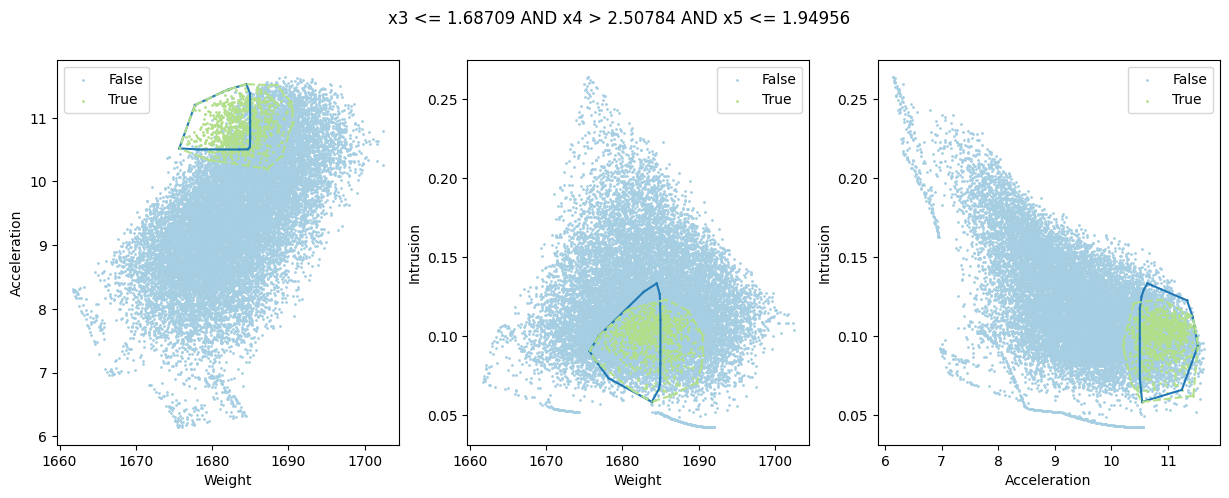

In [11]:
plot_helper(rules, [0], df_crash, obj_names, target_category)
plt.savefig('skope_crash_f2_best.pdf', format='pdf', bbox_inches='tight')

True positives  = 57 / 839
True negatives  = 19161 / 19161
False positives = 0 / 57
False negatives = 782 / 19943


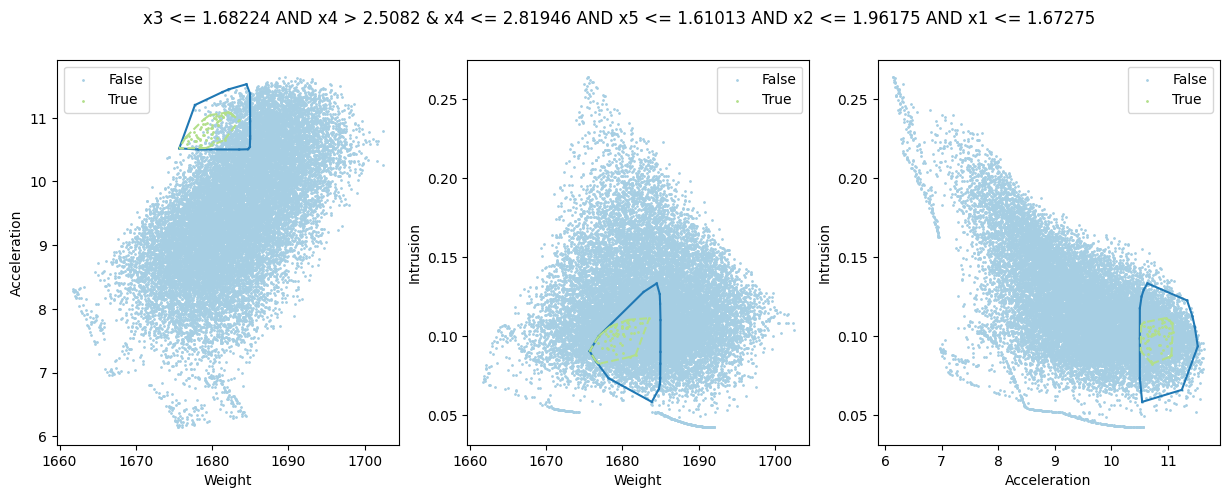

In [14]:
plot_helper(rules, range(13), df_crash, obj_names, target_category)
plt.savefig('skope_crash_f2_combined.pdf', format='pdf', bbox_inches='tight')

## Two-Bar Truss
### Skope-rules

In [21]:
df_twobar, var_names, obj_names = label_two_bar_truss("../data/TwoBarTruss.csv")

target_category = 3

skope_kwargs = {"max_depth": range(1, (len(var_names) + 1)*2),
                "precision_min": 0.1,
                "recall_min": 0.1,
                "bootstrap": True,
                "bootstrap_features": True,
                "max_samples": 0.90,
                "n_estimators": (len(var_names)+1)*10,
                "min_samples_split": 0.05,
                "max_depth_duplication": 10
               }
classifier = train_skope_rules(df_twobar, var_names, target_category, classifier_kwargs=skope_kwargs)
rules = index_rules(explain_skope_rules(classifier))

Rule --> (Accuracy, Recall, F1-score)
0: x1 > 0.0078 and x2 > 0.00492 --> ('0.605', '0.751', '0.670')
1: x1 > 0.00785 and y > 1.90399 --> ('0.560', '0.679', '0.614')
2: x1 > 0.00786 --> ('0.376', '0.804', '0.513')
3: x1 <= 0.00938 and x1 > 0.00784 and y > 1.95218 --> ('0.513', '0.435', '0.471')
4: x1 <= 0.00997 and x1 > 0.00908 --> ('0.483', '0.424', '0.452')
5: x1 <= 0.00926 and x1 > 0.00794 and x2 > 0.00461 --> ('0.513', '0.400', '0.450')
6: x1 > 0.00785 and x2 <= 0.00776 and x2 > 0.00479 --> ('0.499', '0.380', '0.432')
7: x2 > 0.00608 and y > 2.22111 --> ('0.337', '0.587', '0.428')
8: x1 > 0.0078 and y <= 2.57879 and y > 1.90639 --> ('0.488', '0.366', '0.418')
9: x2 <= 0.00995 and x2 > 0.0076 and y > 2.52052 --> ('0.432', '0.276', '0.337')
10: x2 > 0.0076 --> ('0.225', '0.581', '0.325')
11: x2 > 0.00638 and y <= 2.68273 and y > 2.01881 --> ('0.275', '0.364', '0.313')
12: y > 2.59795 --> ('0.228', '0.469', '0.307')
13: x2 <= 0.00964 and x2 > 0.00759 --> ('0.215', '0.459', '0.292')
14

True positives  = 1262 / 1715
True negatives  = 14714 / 15613
False positives = 899 / 2161
False negatives = 453 / 15167


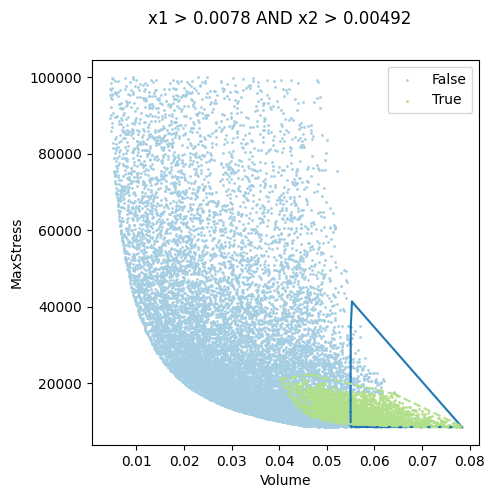

In [22]:
plot_helper(rules, [0], df_twobar, obj_names, target_category)
plt.savefig('skope_bar_f2_best.pdf', format='pdf', bbox_inches='tight')

True positives  = 171 / 1715
True negatives  = 15604 / 15613
False positives = 9 / 180
False negatives = 1544 / 17148


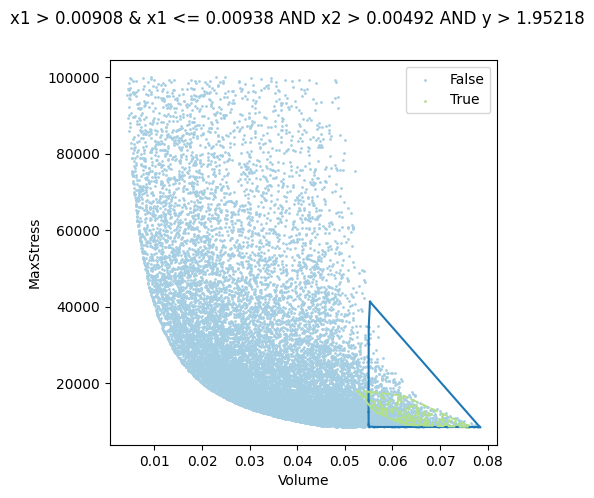

In [26]:
plot_helper(rules, range(5), df_twobar, obj_names, target_category)
plt.savefig('skope_bar_f2_combined.pdf', format='pdf', bbox_inches='tight')

### Rulefit

In [13]:
classifier = train_rulefit_rules(df_twobar, var_names, target_category)
rules = index_rules(explain_rulefit_rules(classifier))

Rule --> (Support, Importance)
0: x1 > 0.00191 --> (0.840027700831025, 0.02106986029418555)
1: x1 > 0.00228 --> (0.8011888273314867, 0.03257600748850236)
2: x1 > 0.00261 --> (0.7685826408125577, 0.09806733211832198)
3: x1 > 0.00263 --> (0.7665050784856879, 0.0618488728544562)
4: x1 > 0.00346 --> (0.6748614958448753, 0.13646966184582807)
5: x1 > 0.00353 --> (0.6678208679593721, 0.07169355554839281)
6: x1 > 0.00369 --> (0.6502192982456141, 0.03965628285399021)
7: x1 > 0.00377 --> (0.6420244690674054, 0.8754683741696221)
8: x2 > 0.00441 --> (0.6087257617728532, 0.1639522876302738)
9: x1 <= 0.00227 and x1 > 0.00092 --> (0.1488342566943675, 0.007879888218413358)
10: x1 <= 0.00286 and x2 <= 0.0068 and x2 > 0.00176 --> (0.14768005540166204, 0.2535939733154101)
11: x1 <= 0.00327 and x2 <= 0.00535 and x2 > 0.00178 --> (0.1258079409048938, 0.07171766171041978)
12: x1 <= 0.00317 and x1 > 0.00086 and x2 <= 0.00581 and x2 > 0.0017 --> (0.12171052631578948, 0.16584924515762806)
13: x1 <= 0.00302 and

In [ ]:
rule = rules[10][0]

con = rule_to_conditions(rule)
df_twobar["mark"] = df_twobar.apply(con, axis=1)

plot_rule_explanations(df_twobar, obj_names, "mark", "category", target_category, title=rule)

## Decision tree

f1=0.7733164717040784


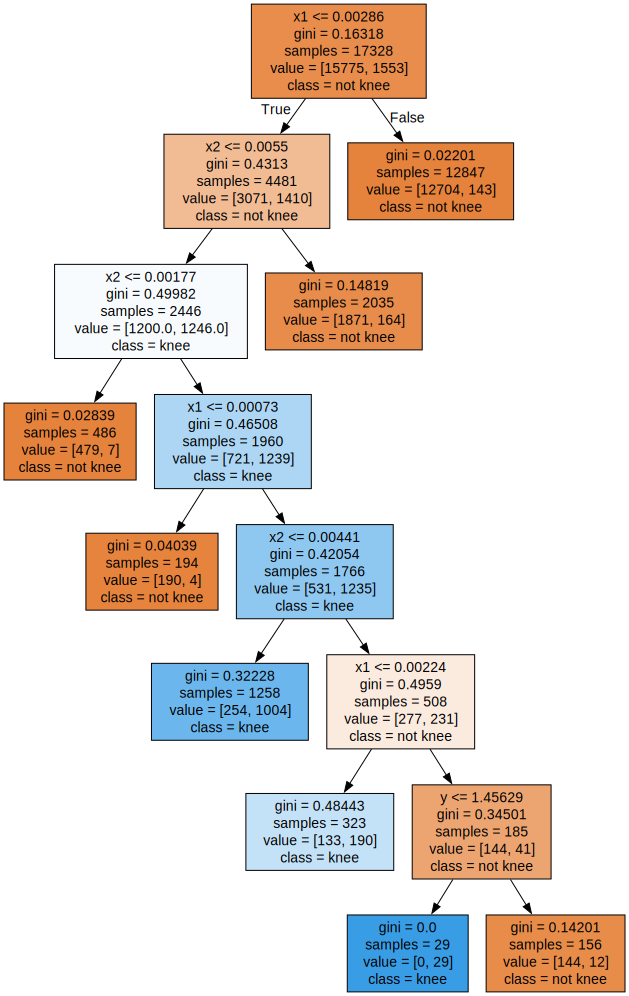

In [51]:
from sklearn import tree
from sklearn.metrics import f1_score
Classifier = tree.DecisionTreeClassifier
import graphviz
import polars as pl

pdf = pl.DataFrame(df_twobar)
pdf = pdf.with_columns(pl.when(pl.col("category") == 1).then(1).otherwise(-1).alias("category"))

xs = pdf[["x1", "x2", "y"]]
ys = pdf[["category"]]
classifier = Classifier(max_leaf_nodes=8)
classifier.fit(xs, ys)

ys_pred = classifier.predict(xs)

f1 = f1_score(ys, ys_pred)
print(f"{f1=}")

dot_data = tree.export_graphviz(classifier, out_file=None, 
                     feature_names=["x1", "x2", "y"],  
                     class_names=["not knee", "knee"],  
                     filled=True, rounded=False, precision=5,  
                     special_characters=False)  
graph = graphviz.Source(dot_data)
graph

## Welded beam
### Skope rules

In [ ]:
df_beam, var_names, obj_names = label_welded_beam("../data/WeldedBeam.csv")

target_category = 3

skope_kwargs = {"max_depth": range(1, len(var_names)+1), "precision_min": 0.5, "recall_min": 0.5}
classifier = train_skope_rules(df_beam, var_names, target_category, classifier_kwargs=skope_kwargs)
rules = index_rules(explain_skope_rules(classifier))

In [ ]:
rule = rules[0][0]

con = rule_to_conditions(rule)
df_beam["skope_mark"] = df_beam.apply(con, axis=1)

plot_rule_explanations(df_beam, obj_names, "skope_mark", "category", target_category, title=rule)

### Rulefit

In [ ]:
classifier = train_rulefit_rules(df_beam, var_names, target_category)
rules = index_rules(explain_rulefit_rules(classifier))

In [ ]:
rule = rules[4][0]

con = rule_to_conditions(rule)
df_beam["mark"] = df_beam.apply(con, axis=1)

plot_rule_explanations(df_beam, obj_names, "mark", "category", target_category, title=rule)